In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and understanding data

In [2]:
country = pd.read_csv("Country-data.csv",encoding = "ISO-8859-1")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Missing value checking
round(100*(country.isnull().sum())/len(country), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [4]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
convert= {'income': float, 
                'gdpp': float
               } 
  
country = country.astype(convert)


In [6]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9), object(1)
memory usage: 13.1+ KB


### checking for outliers


In [7]:
country.describe(percentiles=[0.05,.25,.5,.75,.90,.95,0.98,0.99,0.9956])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000


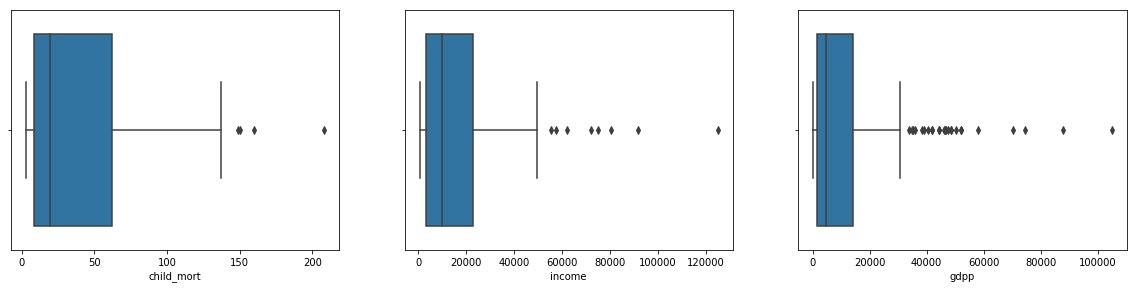

In [8]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x=country["child_mort"])

plt.subplot(3,3,2)
sns.boxplot(x=country["income"])

plt.subplot(3,3,3)
sns.boxplot(x=country["gdpp"])


In [9]:
country.shape

(167, 10)

#### removing outliers

In [10]:
Q1 = country.child_mort.quantile(0.05)
Q3 = country.child_mort.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.child_mort >= Q1 - 1.5*IQR) & (country.child_mort <= Q3 + 1.5*IQR)]

Q1 = country.exports.quantile(0.05)
Q3 = country.exports.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.exports >= Q1 - 1.5*IQR) & (country.exports <= Q3 + 1.5*IQR)]


Q1 = country.income.quantile(0.05)
Q3 = country.income.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.income >= Q1 - 1.5*IQR) & (country.income <= Q3 + 1.5*IQR)]

Q1 = country.gdpp.quantile(0.05)
Q3 = country.gdpp.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.gdpp >= Q1 - 1.5*IQR) & (country.gdpp <= Q3 + 1.5*IQR)]

Q1 = country.inflation.quantile(0.05)
Q3 = country.inflation.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.inflation >= Q1 - 1.5*IQR) & (country.inflation <= Q3 + 1.5*IQR)]


country.shape


(164, 10)

In [11]:
#creating a compy of original data set
country_or=country.copy()
country_or.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [12]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# Standardizing


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]=scaler.fit_transform(country[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']])
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.309740,-1.227720,0.259211,-0.069666,-0.865561,0.292980,-1.617380,1.918013,-0.674732
1,Albania,-0.540682,-0.493713,-0.119102,0.098174,-0.372819,-0.368557,0.657844,-0.865534,-0.474542
2,Algeria,-0.271667,-0.069621,-0.993263,-0.682055,-0.196924,1.183049,0.680483,-0.037812,-0.453600
3,Angola,2.033818,0.904976,-1.478092,-0.160390,-0.611491,2.025005,-1.175919,2.144969,-0.506237
4,Antigua and Barbuda,-0.699075,0.219904,-0.310095,0.565404,0.170264,-0.776171,0.714441,-0.545125,-0.015525


## checking correlation

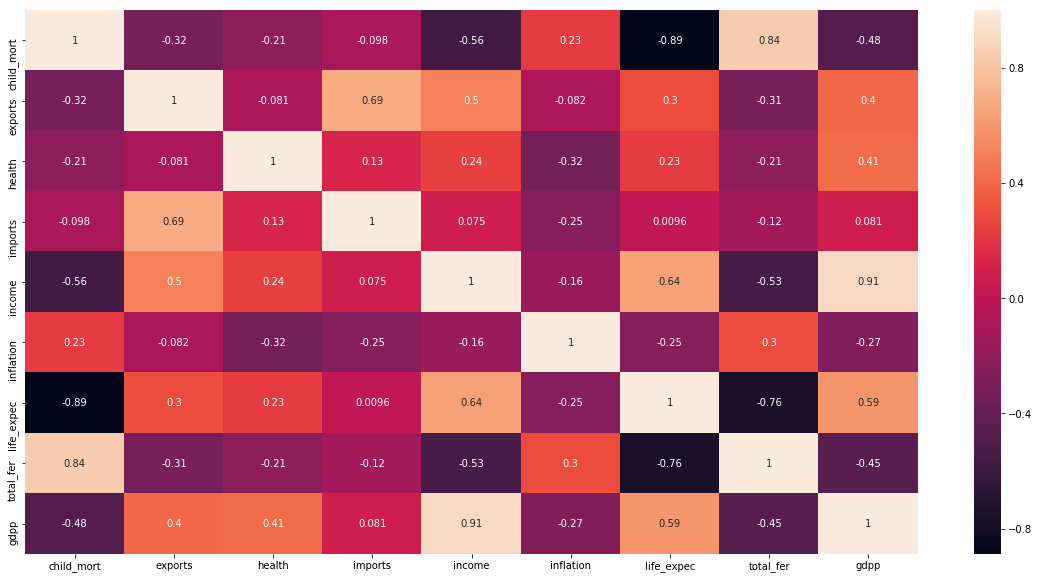

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(country.corr(),annot = True)

In [16]:
#removing column 'country'
x=country.pop("country")
country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.309740,-1.227720,0.259211,-0.069666,-0.865561,0.292980,-1.617380,1.918013,-0.674732
1,-0.540682,-0.493713,-0.119102,0.098174,-0.372819,-0.368557,0.657844,-0.865534,-0.474542
2,-0.271667,-0.069621,-0.993263,-0.682055,-0.196924,1.183049,0.680483,-0.037812,-0.453600
3,2.033818,0.904976,-1.478092,-0.160390,-0.611491,2.025005,-1.175919,2.144969,-0.506237
4,-0.699075,0.219904,-0.310095,0.565404,0.170264,-0.776171,0.714441,-0.545125,-0.015525


## PCA

In [17]:
#importing the PCA model
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [18]:
#implimenting PCA 
pca.fit(country)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
pca.components_

array([[-0.41707142,  0.26416786,  0.18768908,  0.13037811,  0.41046939,
        -0.19325685,  0.42525158, -0.4006349 ,  0.39605627],
       [ 0.16626965,  0.60959466, -0.14025508,  0.71387142, -0.01780182,
        -0.06583848, -0.2178763 ,  0.13068815, -0.04757916],
       [-0.17969762,  0.23818157, -0.67428713, -0.17159462,  0.1205389 ,
         0.60477777,  0.15830297, -0.11626924, -0.08947802],
       [ 0.34764414,  0.09856524,  0.19229972, -0.17589757,  0.47140389,
         0.33594745, -0.18172433,  0.38900432,  0.531111  ],
       [-0.18183315, -0.01302907,  0.60352928,  0.2518542 , -0.19656821,
         0.67595776,  0.05069234, -0.10140126, -0.17515404],
       [ 0.21153109, -0.04075914,  0.00361447, -0.05029309,  0.15419872,
         0.05496542, -0.60272783, -0.74866795,  0.02162972],
       [-0.06947963, -0.68136406, -0.28952827,  0.57355282,  0.08180463,
         0.11899188,  0.00187661,  0.01061626,  0.31170314],
       [ 0.72455736,  0.01039262, -0.0157946 ,  0.05284916, -0

In [20]:
colnames = list(country.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,Feature
0,-0.417071,0.166270,child_mort
1,0.264168,0.609595,exports
2,0.187689,-0.140255,health
3,0.130378,0.713871,imports
4,0.410469,-0.017802,income
5,-0.193257,-0.065838,inflation
6,0.425252,-0.217876,life_expec
7,-0.400635,0.130688,total_fer
8,0.396056,-0.047579,gdpp


### creating screeplot to find the required components 

In [21]:
#variance ratio
pca.explained_variance_ratio_

array([0.46176255, 0.1699294 , 0.13516563, 0.10906535, 0.06795329,
       0.0254524 , 0.01460331, 0.00919995, 0.00686812])

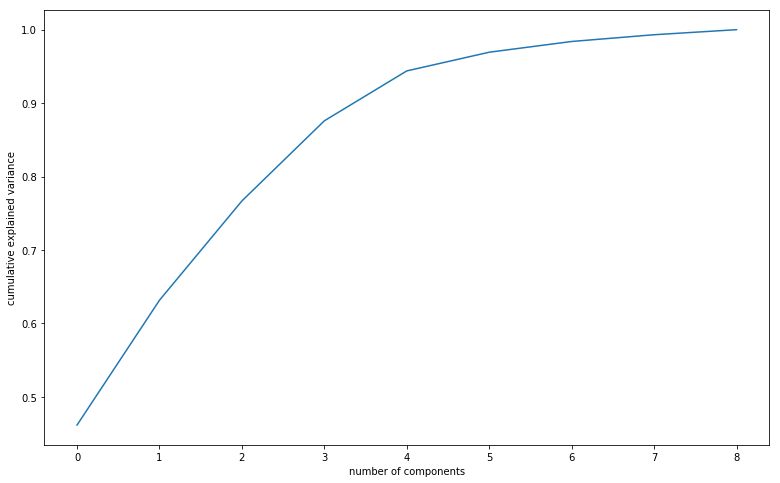

In [22]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (13,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### from the screeplot, 5 number of components can describe around 95% variance in the data set

In [23]:
#using incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [24]:
# basis transformation
country_pca= pca_final.fit_transform(country)
country_pca.shape

(164, 5)

In [25]:
#creating correlation matrix
corr = np.corrcoef(country_pca.transpose())

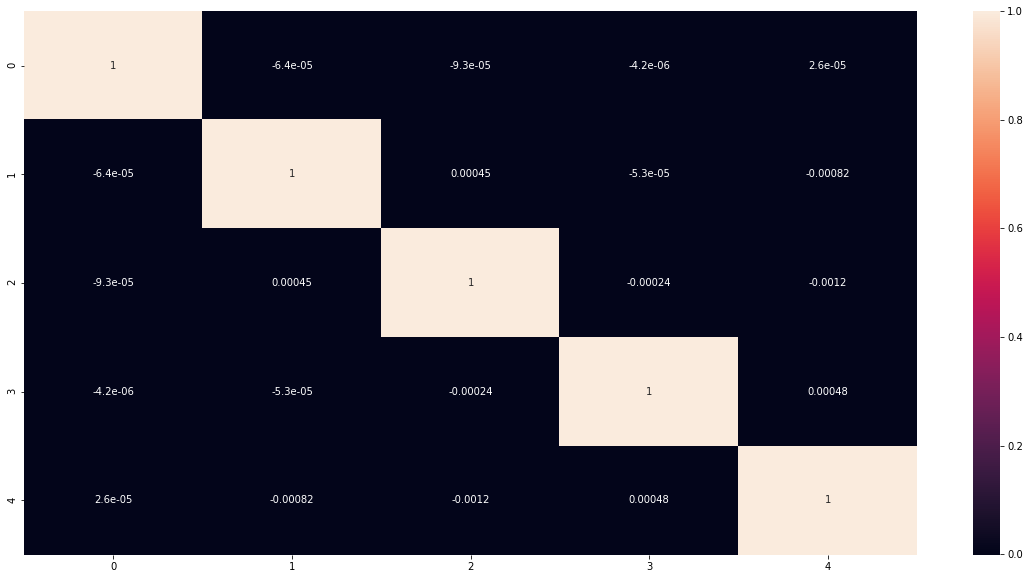

In [26]:
#plotting heatmap for correlation matrix

plt.figure(figsize = (20,10))
sns.heatmap(corr,annot = True)

# clustering

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [28]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=100)
kmeans.fit(country_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [29]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0,
       0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

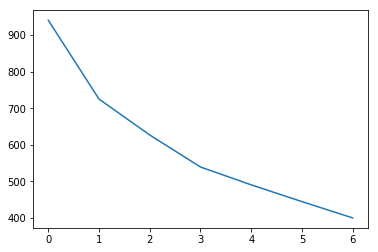

In [30]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=100)
    kmeans.fit(country_pca)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs
plt.plot(ssd)

In [31]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=100)
    kmeans.fit(country_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.2947265724525269
For n_clusters=3, the silhouette score is 0.2953926549102592
For n_clusters=4, the silhouette score is 0.2588650094831585
For n_clusters=5, the silhouette score is 0.26788564884683724
For n_clusters=6, the silhouette score is 0.27054453015052826
For n_clusters=7, the silhouette score is 0.26546933771700437
For n_clusters=8, the silhouette score is 0.2735180137148238


### from elbow curve and silhouette analysis, we are taking k =4

In [32]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50,random_state=100)
kmeans.fit(country_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [33]:
kmeans.labels_

array([2, 1, 3, 2, 1, 3, 3, 0, 0, 3, 1, 1, 3, 1, 1, 0, 1, 2, 1, 3, 1, 2,
       3, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 3, 3, 3, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 3, 3, 3, 1, 2, 2, 1, 1, 0, 0, 3, 2, 1, 0, 2, 0, 1, 3, 2, 2, 1,
       2, 1, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 1, 3, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 3, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 2, 3, 2, 3,
       0, 0, 2, 0, 3, 2, 1, 1, 3, 3, 1, 0, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 0, 3, 1, 2, 1, 0, 0, 3, 2, 1, 2, 2, 1, 1, 3, 1, 2, 1,
       0, 0, 0, 3, 3, 1, 3, 1, 3, 2])

In [34]:
# assign the label
country_or['cluster_id'] = kmeans.labels_
country_or.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,3
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


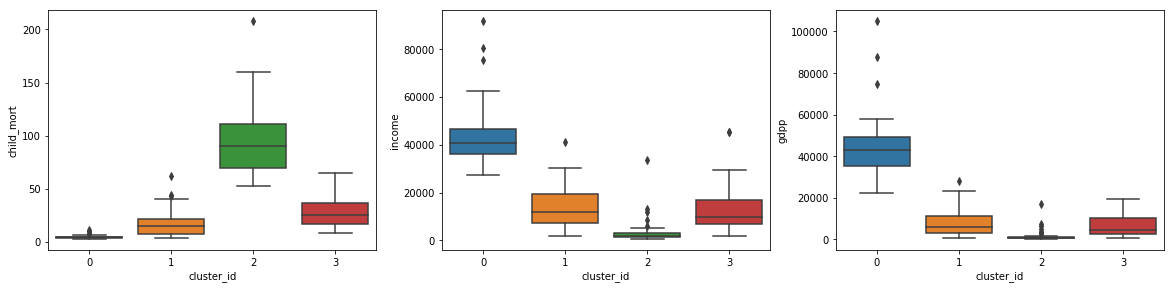

In [35]:
# plot
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x='cluster_id', y='child_mort', data=country_or)

plt.subplot(3,3,2)
sns.boxplot(x='cluster_id',y='income',data=country_or)

plt.subplot(3,3,3)
sns.boxplot(x='cluster_id',y='gdpp',data=country_or)

## Analysis

### on the basis of 'child_mort' clusters are classified as 2 > 3 > 1 > 0
### on the basis of 'income' clusters are classified as 0 > 1 > 3 > 2
### on the basis of 'gdpp' clusters are classified as 0 > 1 > 3 > 2

#### Hence, cluster 2 has low 'gdpp', low 'income, and high 'child_mort' 
#### Which signifies that condtion of countries belongs to cluser-2 is bad and help should be provided here.

In [36]:
final = country_or.groupby('cluster_id')
final.get_group(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,23.80,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,43.60,8.30,51.3,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,2
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0,2
28,Cameroon,108.0,22.20,5.13,27.0,2660.0,1.910,57.3,5.11,1310.0,2
31,Central African Republic,149.0,11.80,3.98,26.5,888.0,2.010,47.5,5.21,446.0,2
32,Chad,150.0,36.80,4.53,43.5,1930.0,6.390,56.5,6.59,897.0,2
36,Comoros,88.2,16.50,4.51,51.7,1410.0,3.870,65.9,4.75,769.0,2


# Hierarchical Clustering

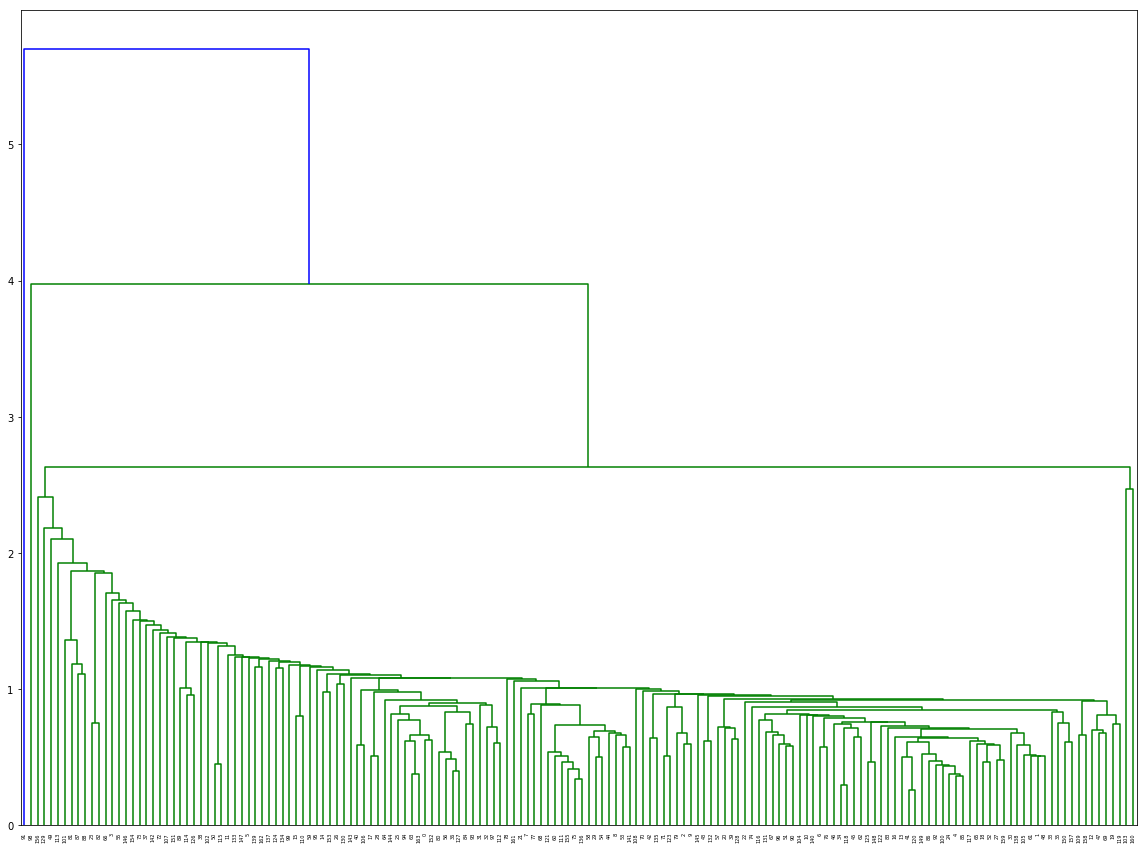

In [37]:
# single linkage
plt.figure(figsize=(20,15))
mergings = linkage(country_pca, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

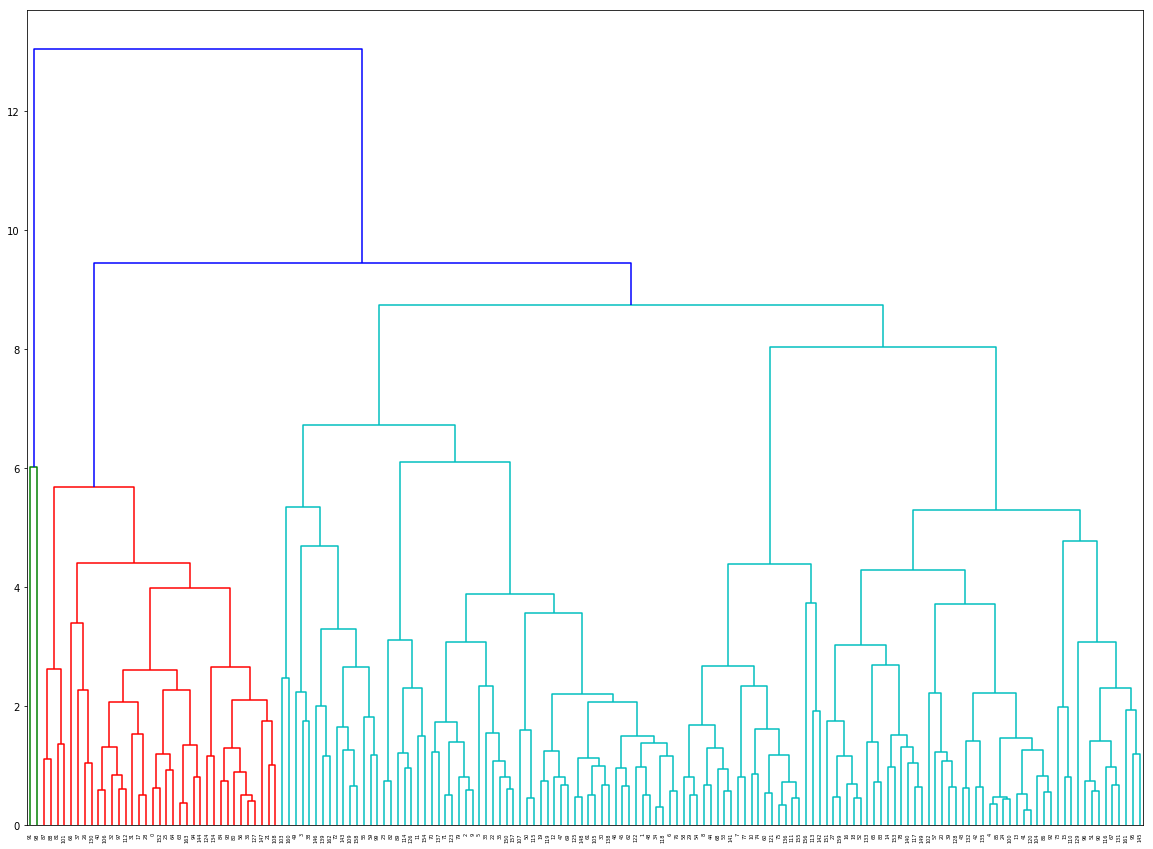

In [38]:
# complete linkage
plt.figure(figsize=(20,15))
mergings = linkage(country_pca, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [39]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0,
       1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2,
       0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 1, 2, 3, 2, 0, 0, 2, 2, 0, 3, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 1, 0])

In [40]:
# assign cluster labels
country_or['cluster_labels'] = cluster_labels
country_or.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,3,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1,2


### clusters by Hierarchical Clustering

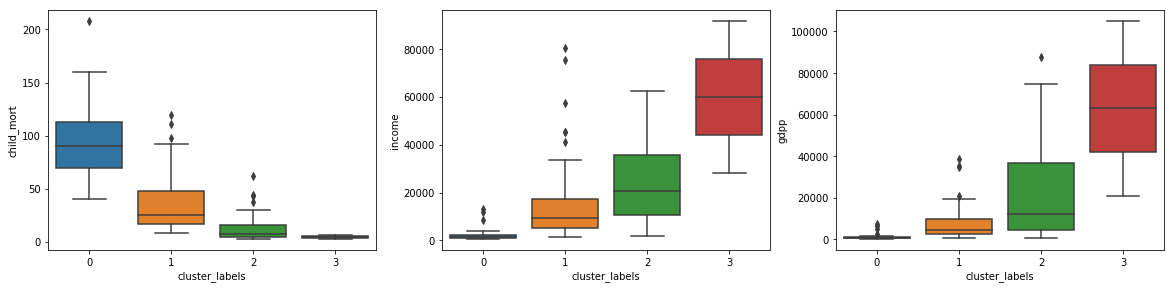

In [41]:
# plot
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x='cluster_labels', y='child_mort', data=country_or)

plt.subplot(3,3,2)
sns.boxplot(x='cluster_labels',y='income',data=country_or)

plt.subplot(3,3,3)
sns.boxplot(x='cluster_labels',y='gdpp',data=country_or)

## Analysis

### on the basis of 'child_mort' clusters are classified as 0 > 1 > 2 > 3
### on the basis of 'income' clusters are classified as 3 > 2 > 1 > 0
### on the basis of 'gdpp' clusters are classified as 3 > 2 > 1 > 0



# clusters by k-means clustering

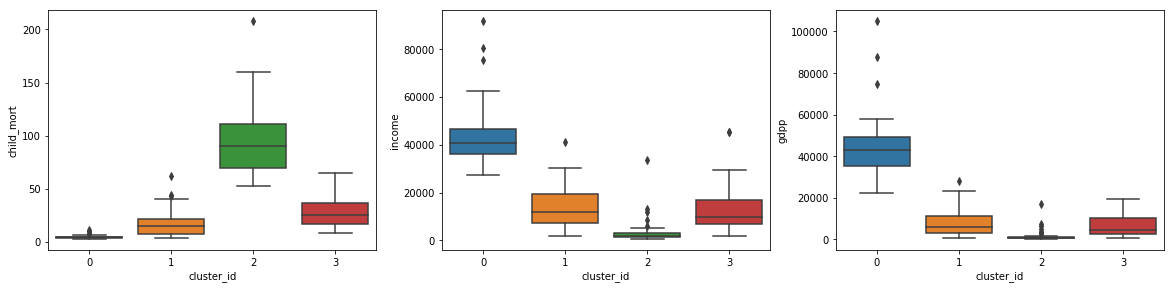

In [42]:
# plot
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x='cluster_id', y='child_mort', data=country_or)

plt.subplot(3,3,2)
sns.boxplot(x='cluster_id',y='income',data=country_or)

plt.subplot(3,3,3)
sns.boxplot(x='cluster_id',y='gdpp',data=country_or)

### By comparing boxplots of clusters created by both k-means and hierarchical clustering ,we found that k-means clustering prodives better results. Hence we are considering cluster-2 countries

In [43]:
final = country_or.groupby('cluster_id')
rx=final.get_group(2).sort_values(["child_mort","income","gdpp"],ascending=[False,True,True])


### Top - 10 recommended countries 

In [44]:
rx.reset_index().head(10)

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.45,32.1,3.33,662.0,2,0
1,132,Sierra Leone,160.0,16.8,13.10,34.5,1220.0,17.20,55.0,5.20,399.0,2,0
2,32,Chad,150.0,36.8,4.53,43.5,1930.0,6.39,56.5,6.59,897.0,2,0
3,31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.01,47.5,5.21,446.0,2,0
4,97,Mali,137.0,22.8,4.98,35.1,1870.0,4.37,59.5,6.55,708.0,2,0
5,112,Niger,123.0,22.2,5.16,49.1,814.0,2.55,58.8,7.49,348.0,2,0
6,3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2,1
7,37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609.0,20.80,57.5,6.54,334.0,2,0
8,25,Burkina Faso,116.0,19.2,6.74,29.6,1430.0,6.81,57.9,5.87,575.0,2,0
9,64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390.0,2.97,55.6,5.05,547.0,2,0
